In [52]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [53]:
def OpenImage(path):
    I = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    L, C = I.shape
    return I, L, C

In [54]:
def Divide(image):
    if len(image.shape) == 2:
        return image, image, image
    B, G, R = cv2.split(image)
    return B, G, R


def HSV(image):
    if len(image.shape) == 2:
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    hsv_image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    return hsv_image


def CountPix(image):
    if len(image.shape) == 2:
        L, C = image.shape
    else:
        L, C, _ = image.shape
    N = L * C
    return N


def FactPix(image, alpha=1.0, beta=0):
    I_fact = cv2.convertScaleAbs(image, alpha=alpha, beta=beta)
    return I_fact

In [55]:
def Func_a(image):
    image_float = image.astype(np.float64)
    
    # Logarithm (add 1 to avoid log(0))
    log_image = np.log1p(image_float)
    log_image = np.uint8(cv2.normalize(log_image, None, 0, 255, cv2.NORM_MINMAX))
    
    # Exponential
    exp_image = np.exp(image_float / 255.0)
    exp_image = np.uint8(cv2.normalize(exp_image, None, 0, 255, cv2.NORM_MINMAX))
    
    # Square
    square_image = np.square(image_float)
    square_image = np.uint8(cv2.normalize(square_image, None, 0, 255, cv2.NORM_MINMAX))
    
    # Square root
    sqrt_image = np.sqrt(image_float)
    sqrt_image = np.uint8(cv2.normalize(sqrt_image, None, 0, 255, cv2.NORM_MINMAX))
    
    return log_image, exp_image, square_image, sqrt_image


def Func_m(image):
    mu = np.mean(image)
    std_dev = np.std(image)
    return mu, std_dev

In [56]:
def Normalize(image, new_min=0, new_max=255):
    Inorm = cv2.normalize(image, None, new_min, new_max, cv2.NORM_MINMAX)
    Inorm = np.uint8(Inorm)
    return Inorm


def Inverse(image):
    max_val = np.max(image)
    Inv = max_val - image
    return Inv


def CalcHist(image):
    H = cv2.calcHist([image], [0], None, [256], [0, 256])
    H = H.flatten()
    b = np.arange(256)
    return H, b


def Threshold(image, threshold_value):
    _, T = cv2.threshold(image, threshold_value, 255, cv2.THRESH_BINARY)
    return T

In [57]:
def Func_j(image_path):
    I, L, C = OpenImage(image_path)
    H_original, b = CalcHist(I)
    I_inv = Inverse(I)
    H_inverted, _ = CalcHist(I_inv)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(I, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.plot(b, H_original)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.imshow(I_inv, cmap='gray')
    plt.title('Inverted Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.plot(b, H_inverted)
    plt.title('Inverted Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return I, I_inv, H_original, H_inverted

In [58]:
def Func_t(image_path):
    I, L, C = OpenImage(image_path)
    H_original, b = CalcHist(I)
    I_norm = Normalize(I, new_min=10, new_max=50)
    H_normalized, _ = CalcHist(I_norm)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(I, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.plot(b, H_original)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.imshow(I_norm, cmap='gray')
    plt.title('Normalized Image [10, 50]')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.plot(b, H_normalized)
    plt.title('Normalized Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.xlim([0, 255])
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    print("\nInterpretation:")
    print("Pixel values are compressed to [10, 50], reducing contrast.")
    
    return I, I_norm, H_original, H_normalized

In [59]:
def Func_f(image_path):
    I, L, C = OpenImage(image_path)
    H_original, b = CalcHist(I)
    I_thresh = Threshold(I, threshold_value=128)
    H_thresholded, _ = CalcHist(I_thresh)
    
    plt.figure(figsize=(12, 8))
    
    plt.subplot(2, 2, 1)
    plt.imshow(I, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    plt.subplot(2, 2, 2)
    plt.plot(b, H_original)
    plt.title('Original Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.subplot(2, 2, 3)
    plt.imshow(I_thresh, cmap='gray')
    plt.title('Thresholded Image (s=128)')
    plt.axis('off')
    
    plt.subplot(2, 2, 4)
    plt.plot(b, H_thresholded)
    plt.title('Thresholded Histogram')
    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.grid(True)
    
    plt.tight_layout()
    plt.show()
    
    return I, I_thresh, H_original, H_thresholded

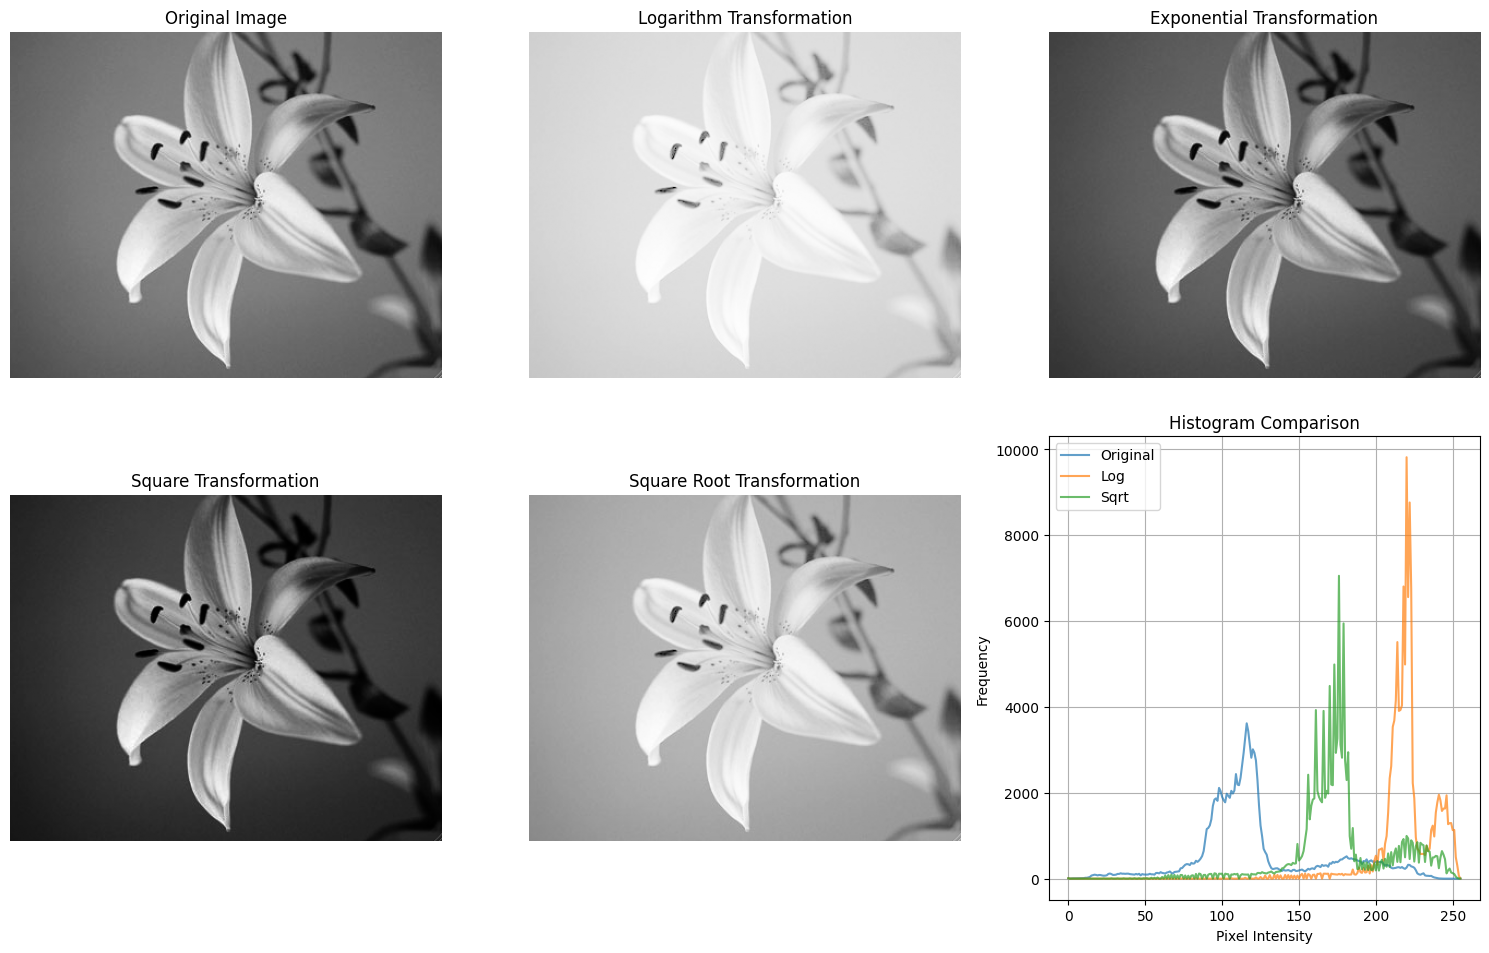

Transformations enhance different aspects:
- Logarithm: Brightens dark regions, compresses bright regions
- Exponential: Darkens image, expands bright regions
- Square: Increases contrast in bright regions
- Square Root: Enhances contrast in dark regions


In [60]:
image_path = '../Lab1/flower.png'
I, L, C = OpenImage(image_path)


# Apply Func_a transformations
log_img, exp_img, square_img, sqrt_img = Func_a(I)

# Visualize all transformations
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.imshow(I, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 3, 2)
plt.imshow(log_img, cmap='gray')
plt.title('Logarithm Transformation')
plt.axis('off')

plt.subplot(2, 3, 3)
plt.imshow(exp_img, cmap='gray')
plt.title('Exponential Transformation')
plt.axis('off')

plt.subplot(2, 3, 4)
plt.imshow(square_img, cmap='gray')
plt.title('Square Transformation')
plt.axis('off')

plt.subplot(2, 3, 5)
plt.imshow(sqrt_img, cmap='gray')
plt.title('Square Root Transformation')
plt.axis('off')

plt.subplot(2, 3, 6)
# Show histograms comparison
H_orig, b = CalcHist(I)
H_log, _ = CalcHist(log_img)
H_sqrt, _ = CalcHist(sqrt_img)
plt.plot(b, H_orig, label='Original', alpha=0.7)
plt.plot(b, H_log, label='Log', alpha=0.7)
plt.plot(b, H_sqrt, label='Sqrt', alpha=0.7)
plt.title('Histogram Comparison')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

print("Transformations enhance different aspects:")
print("- Logarithm: Brightens dark regions, compresses bright regions")
print("- Exponential: Darkens image, expands bright regions")
print("- Square: Increases contrast in bright regions")
print("- Square Root: Enhances contrast in dark regions")

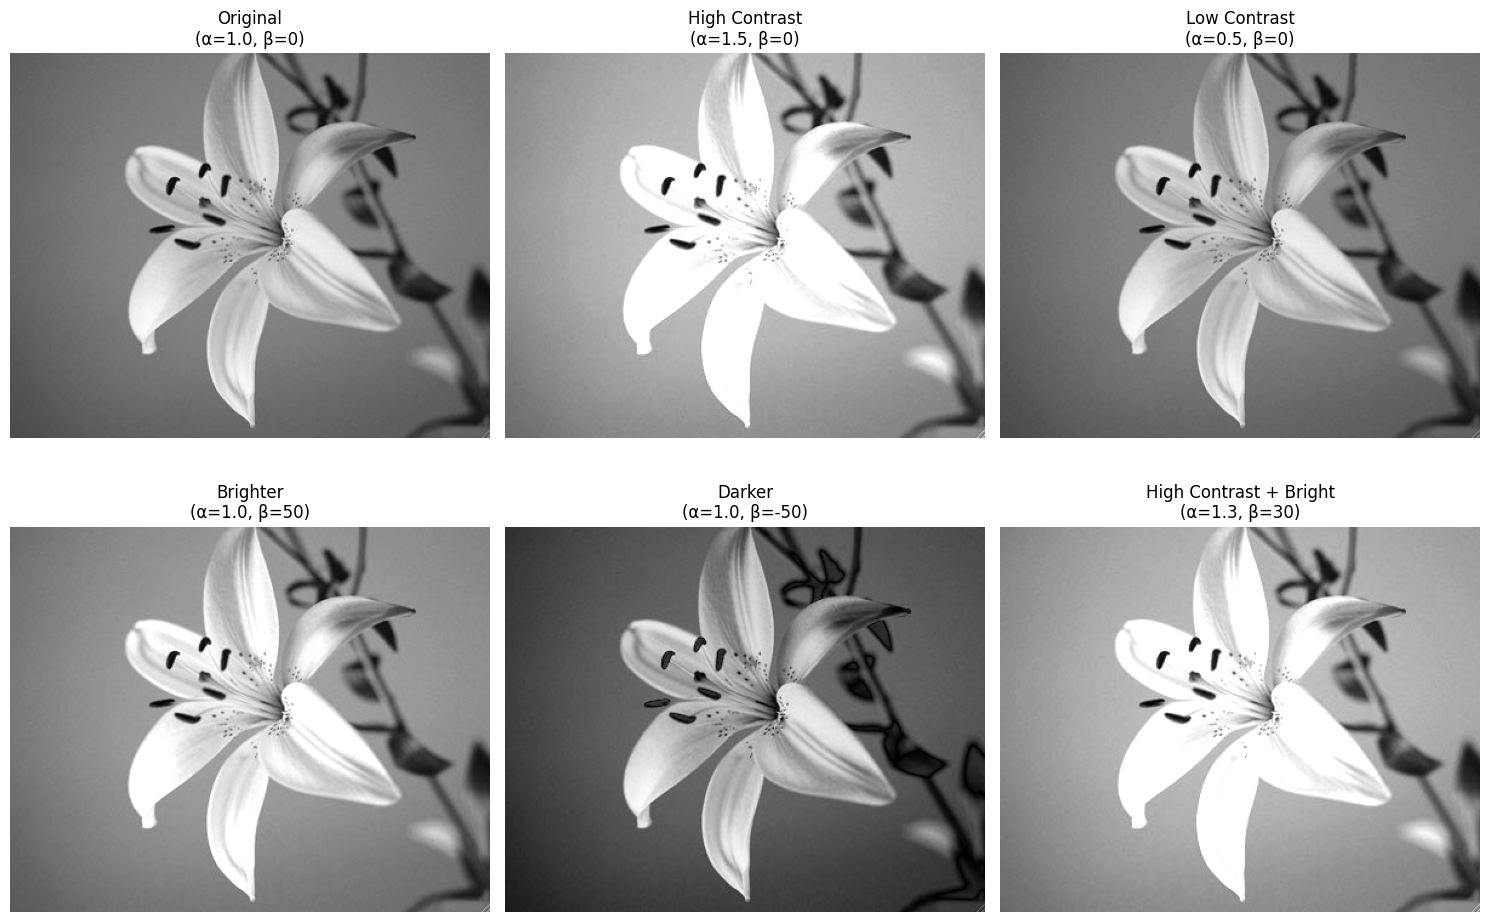

FactPix Formula: I_new = alpha × I + beta
- alpha (α): Controls contrast (higher = more contrast)
- beta (β): Controls brightness (positive = brighter, negative = darker)


In [ ]:
# Test different alpha and beta values
variations = [
    (I, "Original\n(α=1.0, β=0)"),
    (FactPix(I, alpha=1.5, beta=0), "High Contrast\n(α=1.5, β=0)"),
    (FactPix(I, alpha=0.5, beta=0), "Low Contrast\n(α=0.5, β=0)"),
    (FactPix(I, alpha=1.0, beta=50), "Brighter\n(α=1.0, β=50)"),
    (FactPix(I, alpha=1.0, beta=-50), "Darker\n(α=1.0, β=-50)"),
    (FactPix(I, alpha=1.3, beta=30), "High Contrast + Bright\n(α=1.3, β=30)")
]

plt.figure(figsize=(15, 10))

for idx, (img, title) in enumerate(variations, 1):
    plt.subplot(2, 3, idx)
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')

plt.tight_layout()
plt.show()

print("FactPix Formula: I_new = alpha × I + beta")

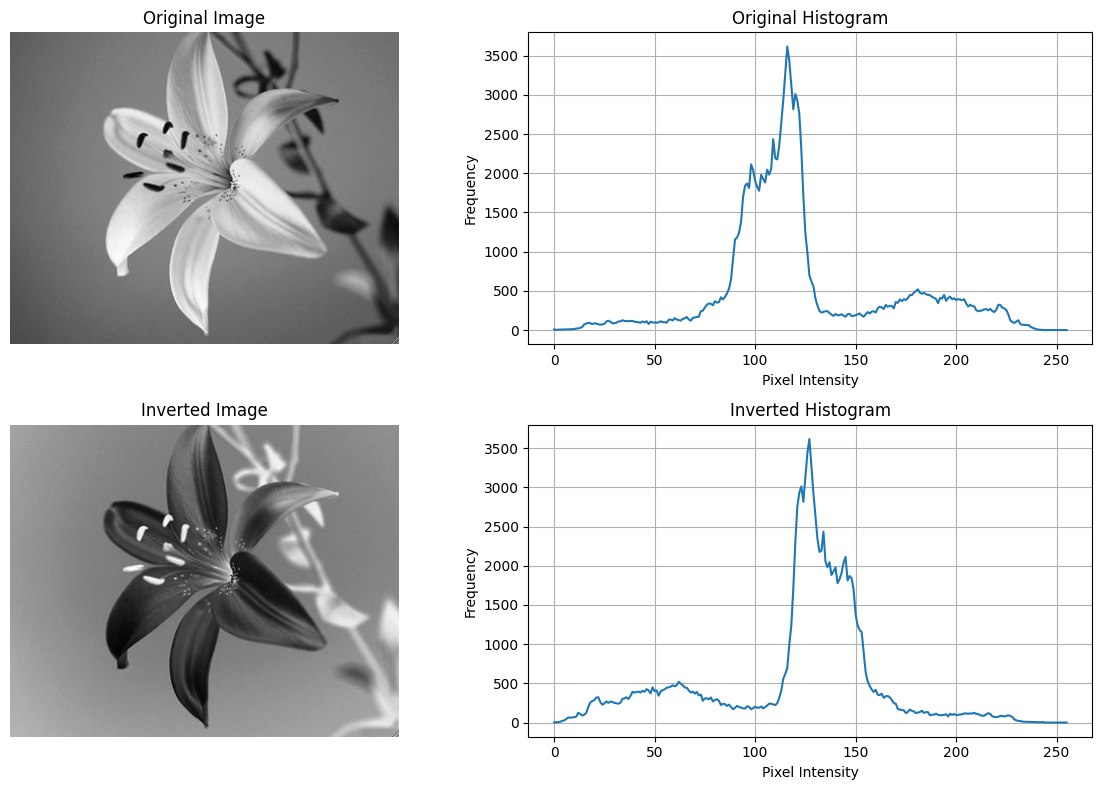

Func_j completed!
Original image mean: 123.03
Inverted image mean: 119.97

The histogram is flipped - dark pixels become bright and vice versa.


In [62]:
# Run Func_j - Inversion Pipeline
I_original, I_inverted, H_original, H_inverted = Func_j('../Lab1/flower.png')

print("Func_j completed!")
print(f"Original image mean: {np.mean(I_original):.2f}")
print(f"Inverted image mean: {np.mean(I_inverted):.2f}")
print("\nThe histogram is flipped - dark pixels become bright and vice versa.")

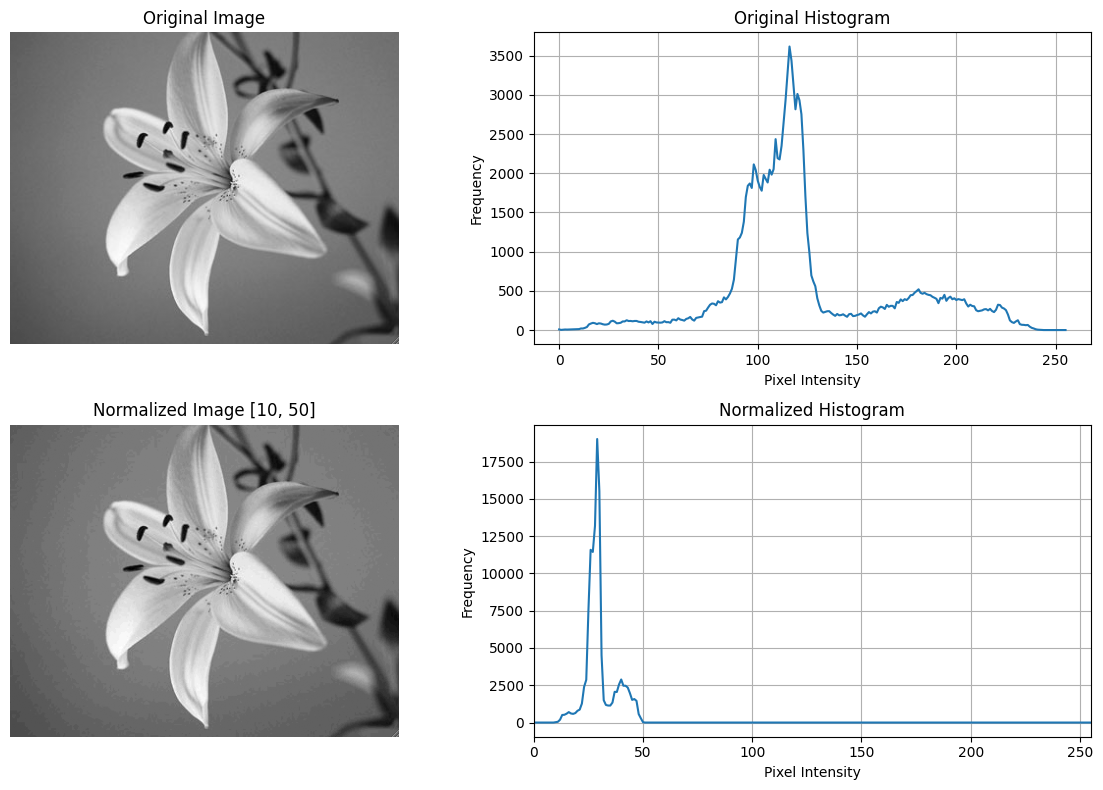


Interpretation:
Pixel values are compressed to [10, 50], reducing contrast.
Func_t completed!
Original range: [0, 243]
Normalized range: [10, 50]

Interpretation:
The normalized image appears darker and less contrasted because
all pixel values are compressed into a narrow range [10, 50].


In [63]:
# Run Func_t - Normalization Pipeline
I_original, I_normalized, H_original, H_normalized = Func_t('../Lab1/flower.png')

print("Func_t completed!")
print(f"Original range: [{I_original.min()}, {I_original.max()}]")
print(f"Normalized range: [{I_normalized.min()}, {I_normalized.max()}]")
print("\nInterpretation:")
print("The normalized image appears darker and less contrasted because")
print("all pixel values are compressed into a narrow range [10, 50].")

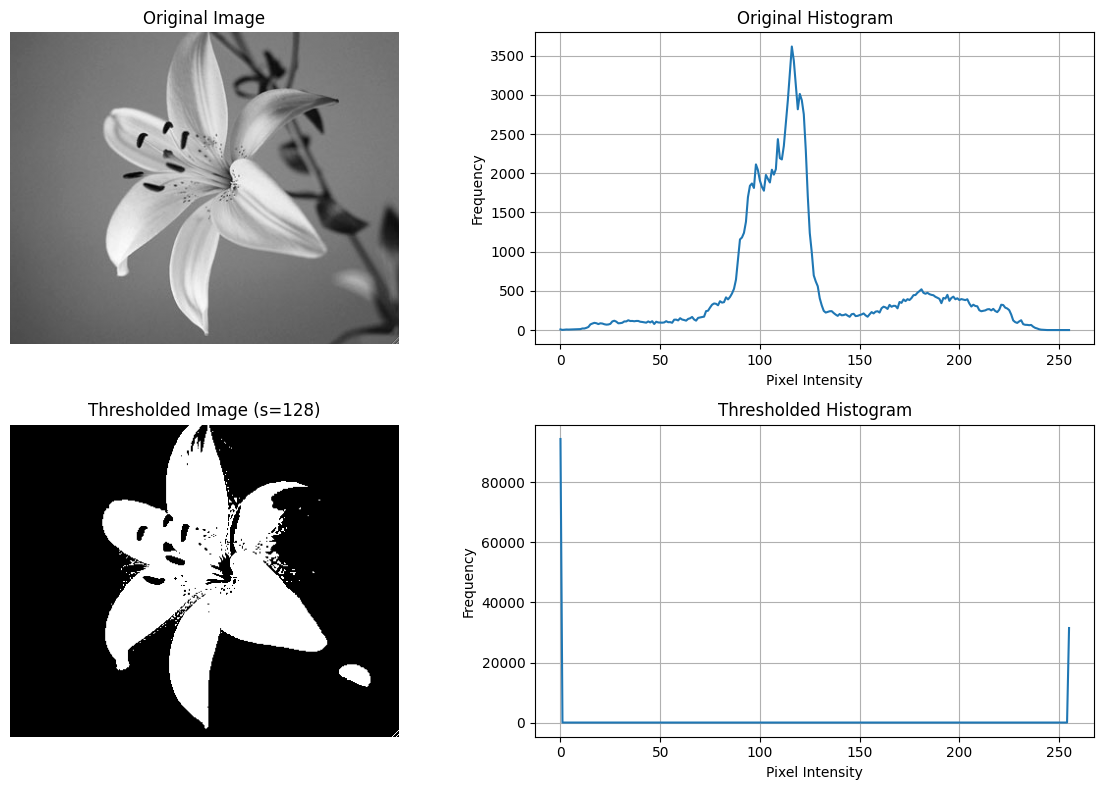

Func_f completed!
Original unique values: 244
Thresholded unique values: [  0 255]
Percentage of white pixels: 25.00%
Percentage of black pixels: 75.00%

Thresholding creates a binary image (only 0 and 255 values).


In [64]:
# Run Func_f - Thresholding Pipeline
I_original, I_thresholded, H_original, H_thresholded = Func_f('../Lab1/flower.png')

print("Func_f completed!")
print(f"Original unique values: {len(np.unique(I_original))}")
print(f"Thresholded unique values: {np.unique(I_thresholded)}")
print(f"Percentage of white pixels: {100 * np.sum(I_thresholded == 255) / I_thresholded.size:.2f}%")
print(f"Percentage of black pixels: {100 * np.sum(I_thresholded == 0) / I_thresholded.size:.2f}%")
print("\nThresholding creates a binary image (only 0 and 255 values).")

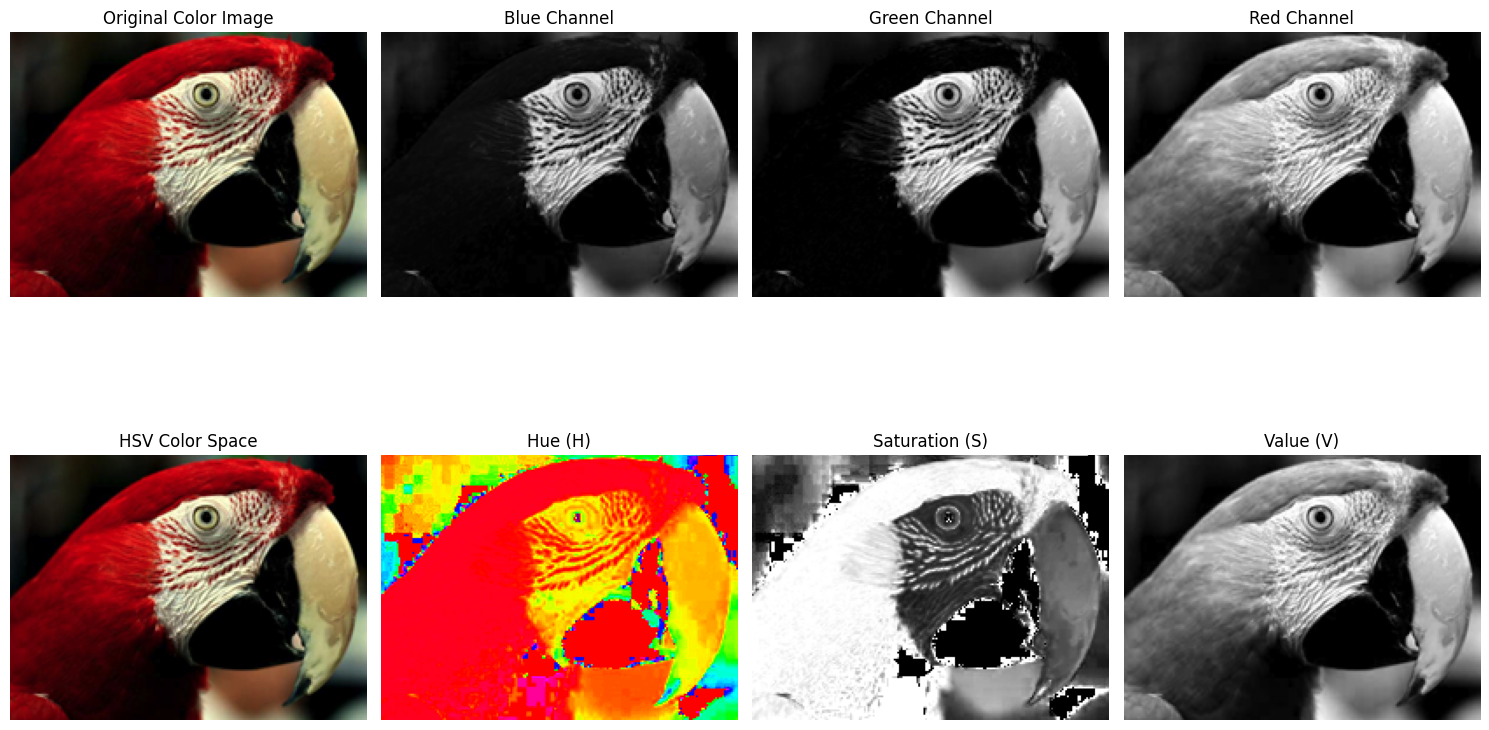

Color Image Analysis:
Image shape: (152, 204, 3)
B channel mean: 40.49
G channel mean: 49.27
R channel mean: 93.75

HSV Channels:
Hue range: [0, 179] in OpenCV
Saturation range: [0, 255]
Value range: [0, 255]


In [65]:
# Load a color image
color_image = cv2.imread('../Lab1/red_bird.png', cv2.IMREAD_COLOR)

# Use Divide to split channels
B, G, R = Divide(color_image)

# Convert to HSV
hsv_image = HSV(color_image)
H, S, V = cv2.split(hsv_image)

# Visualize
fig = plt.figure(figsize=(15, 10))

# Original
plt.subplot(2, 4, 1)
plt.imshow(cv2.cvtColor(color_image, cv2.COLOR_BGR2RGB))
plt.title('Original Color Image')
plt.axis('off')

# BGR Channels
plt.subplot(2, 4, 2)
plt.imshow(B, cmap='gray')
plt.title('Blue Channel')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(G, cmap='gray')
plt.title('Green Channel')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(R, cmap='gray')
plt.title('Red Channel')
plt.axis('off')

# HSV Channels
plt.subplot(2, 4, 5)
plt.imshow(cv2.cvtColor(hsv_image, cv2.COLOR_HSV2RGB))
plt.title('HSV Color Space')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(H, cmap='hsv')
plt.title('Hue (H)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(S, cmap='gray')
plt.title('Saturation (S)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(V, cmap='gray')
plt.title('Value (V)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Color Image Analysis:")
print(f"Image shape: {color_image.shape}")
print(f"B channel mean: {np.mean(B):.2f}")
print(f"G channel mean: {np.mean(G):.2f}")
print(f"R channel mean: {np.mean(R):.2f}")
print(f"\nHSV Channels:")
print(f"Hue range: [0, 179] in OpenCV")
print(f"Saturation range: [0, 255]")
print(f"Value range: [0, 255]")

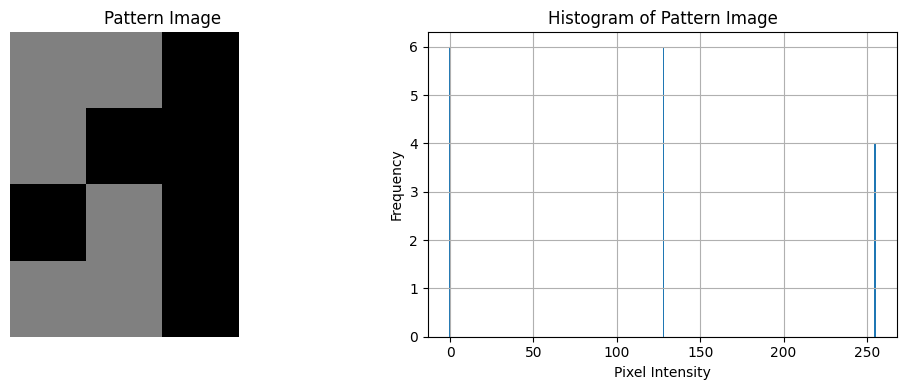

Pattern matrix shape: (4, 4)
Generated randn with mean=128 and std=23.86
rand matrix shape: (512, 512)
randn matrix shape: (512, 512)
randint matrix shape: (512, 512)


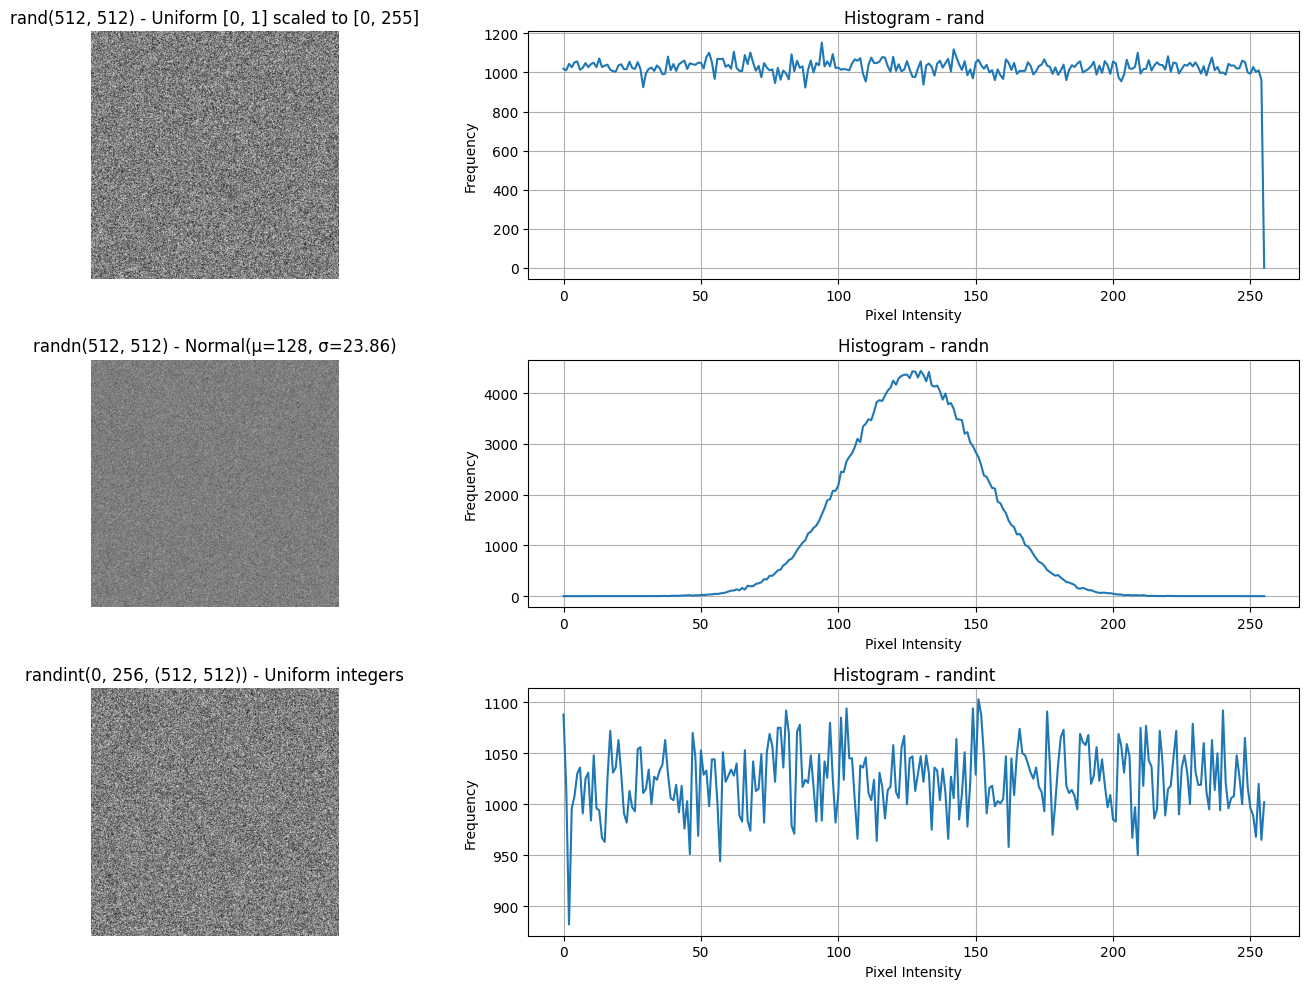

In [66]:
# Define pattern matrix
I_pattern = np.array([
    [128, 128, 0, 255],
    [128, 0, 0, 255],
    [0, 128, 0, 255],
    [128, 128, 0, 255],
], dtype=np.uint8)

# Visualize pattern and its histogram
H_pattern, b_pattern = CalcHist(I_pattern)

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.imshow(I_pattern, cmap='gray')
plt.title('Pattern Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.bar(b_pattern, H_pattern, width=1.0)
plt.title('Histogram of Pattern Image')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"Pattern matrix shape: {I_pattern.shape}")
# Method 1: rand - uniform distribution [0, 1]
ran_d = np.random.rand(512, 512)
ran_d = np.uint8(ran_d * 255)

# Method 2: randn - normal distribution with mean=128 and random std
random_std = np.random.uniform(10, 50)
ran_dN = np.random.randn(512, 512) * random_std + 128
ran_dN = np.clip(ran_dN, 0, 255)
ran_dN = np.uint8(ran_dN)

# Method 3: randint - integers in range [0, 256)
ran_dINT = np.random.randint(low=0, high=256, size=(512, 512), dtype=np.uint8)

print(f"Generated randn with mean=128 and std={random_std:.2f}")
print(f"rand matrix shape: {ran_d.shape}")
print(f"randn matrix shape: {ran_dN.shape}")
print(f"randint matrix shape: {ran_dINT.shape}")
# Calculate histograms
H_rand, b_rand = CalcHist(ran_d)
H_randn, b_randn = CalcHist(ran_dN)
H_randint, b_randint = CalcHist(ran_dINT)

# Visualize
plt.figure(figsize=(15, 10))

# rand
plt.subplot(3, 2, 1)
plt.imshow(ran_d, cmap='gray')
plt.title('rand(512, 512) - Uniform [0, 1] scaled to [0, 255]')
plt.axis('off')

plt.subplot(3, 2, 2)
plt.plot(b_rand, H_rand)
plt.title('Histogram - rand')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# randn
plt.subplot(3, 2, 3)
plt.imshow(ran_dN, cmap='gray')
plt.title(f'randn(512, 512) - Normal(μ=128, σ={random_std:.2f})')
plt.axis('off')

plt.subplot(3, 2, 4)
plt.plot(b_randn, H_randn)
plt.title('Histogram - randn')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

# randint
plt.subplot(3, 2, 5)
plt.imshow(ran_dINT, cmap='gray')
plt.title('randint(0, 256, (512, 512)) - Uniform integers')
plt.axis('off')

plt.subplot(3, 2, 6)
plt.plot(b_randint, H_randint)
plt.title('Histogram - randint')
plt.xlabel('Pixel Intensity')
plt.ylabel('Frequency')
plt.grid(True)

plt.tight_layout()
plt.show()